#imports and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

In [1]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_sub = X_train[:600,:]
y_sub = train_labels[:600]

NameError: ignored

#Full data
(started at 12:18 PM Friday 8/28)

In [ ]:
#cross val
"""
cv_acc=[]
for k in range(1,13): 
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train, train_labels, scoring='accuracy', cv=6)
    cv_acc.append(scores.mean())
    print('K is',k,'\n acc is:', scores.mean())
"""
#on testing data
test_acc=[]
for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, train_labels)
    y_preds = model.predict(X_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    test_acc.append(score)
    print('K is',k,'\n acc is:', score)

#cv_error = 1-np.array(cv_acc)
#test_error = 1-np.array(test_acc)

K is 1 
 acc is: 0.8497
K is 2 
 acc is: 0.846
K is 3 
 acc is: 0.8541
K is 4 
 acc is: 0.8577
K is 5 
 acc is: 0.8554
K is 6 
 acc is: 0.8544
K is 7 
 acc is: 0.854
K is 8 
 acc is: 0.8534
K is 9 
 acc is: 0.8519
K is 10 
 acc is: 0.8515
K is 11 
 acc is: 0.8495
K is 12 
 acc is: 0.8471


Text(0, 0.5, 'Percent Error')

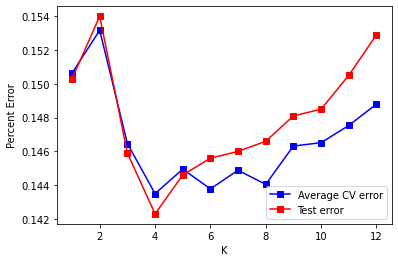

In [ ]:
cv_acc = [.8493666666666666, .8468333333333332, .8535333333333334, .8564999999999999,
          .85505, .8562166666666667, .8551166666666666, .85595, .8536833333333335,
          .8534833333333335,.8524666666666666, .8512]

test_acc=[0.8497,0.846,0.8541,0.8577,0.8554,0.8544,
          0.854,0.8534,0.8519,0.8515,0.8495,0.8471]


cv_error = 1-np.array(cv_acc)
test_error = 1-np.array(test_acc)

#plots
plt.plot(range(1,13), cv_error, '-bs', label='Average CV error')
plt.plot(range(1,13), test_error,'-rs', label = 'Test error')
plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')